In [1]:
import pandas as pd

df1 = pd.read_csv("3793_2016.csv", encoding="shift-jis", skiprows=1)
df2 = pd.read_csv("3793_2017.csv", encoding="shift-jis", skiprows=1)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df3 =  pd.concat([df1, df2], ignore_index=True)
df3

,日付,始値,高値,安値,終値,出来高,終値調整値
0,2016-01-04,556,576,548,548,35200,274.0
1,2016-01-05,547,557,530,540,17000,270.0
2,2016-01-06,541,548,520,521,21000,260.5
3,2016-01-07,518,518,500,504,39500,252.0
4,2016-01-08,490,507,490,504,35100,252.0
...,...,...,...,...,...,...,...
487,2017-12-25,1208,1230,1175,1181,937500,1181.0
488,2017-12-26,1181,1204,1154,1164,934000,1164.0
489,2017-12-27,1174,1212,1170,1208,434100,1208.0
490,2017-12-28,1214,1218,1174,1181,448300,1181.0


In [105]:
df3["日付"]

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
487    2017-12-25
488    2017-12-26
489    2017-12-27
490    2017-12-28
491    2017-12-29
Name: 日付, Length: 492, dtype: object

In [106]:
# df[['name', 'kcal']].query('kcal > 450 and name == "豚肉の生姜焼"') 
df3[df3["日付"] == "2017-03-02"]

,日付,始値,高値,安値,終値,出来高,終値調整値
285,2017-03-02,2506,2650,2433,2599,774600,1299.5


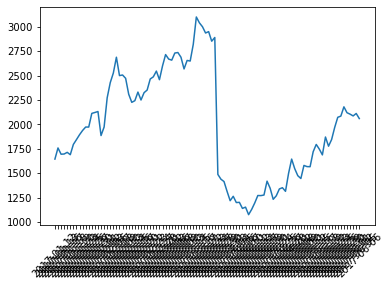

In [107]:
#2月 23日がイベント日

#受け渡し日は3月2日
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.plot(df3["日付"].values[250:350], df3["終値"].values[250:350])

In [108]:
df3[df3["日付"] == "2017-03-02"]

,日付,始値,高値,安値,終値,出来高,終値調整値
285,2017-03-02,2506,2650,2433,2599,774600,1299.5


In [109]:
491 - 285

206

In [110]:
len(df3)

492

In [111]:
t_list = [i for i in range(-285, 207)]
print(len(t_list))

492


In [112]:
df3["t"] = t_list 
df3[df3["t"] == 0]

,日付,始値,高値,安値,終値,出来高,終値調整値,t
285,2017-03-02,2506,2650,2433,2599,774600,1299.5,0


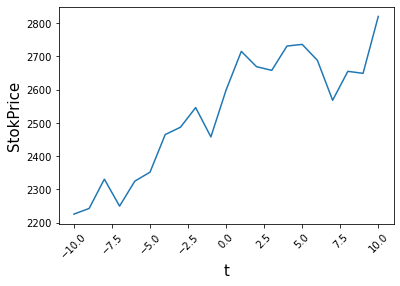

In [113]:
df3[df3["t"] == 0]
#受け渡し日は3月2日
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.ylabel('StokPrice', fontsize=15)
plt.xlabel('t', fontsize=15)
plt.plot(df3["t"].values[275:296], df3["終値"].values[275:296])

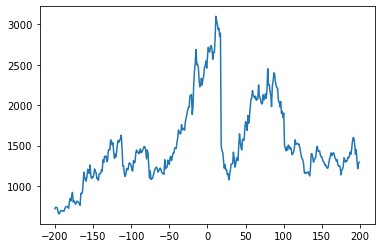

In [114]:
plt.plot(df3["t"].values[85:485], df3["終値"].values[85:485])

In [ ]:
#第三者割当

公募増資の内容

In [67]:
####公募増資による資金調達額（予定）（円）####
# 増資前の資本金の額 1,196,638,851 円 (平成 28 年9月 30 日現在)
# (2) 公募増資により増加する資本金の額 352,586,250 円
# (3) 公募増資後の資本金の額 1,549,225,101 円
# (4) 並行第三者割当増資により増加する資本金の額 101,556,000 円
# (5) 並行第三者割当増資後の資本金の額 1,650,781,101 円


######公募価格（予定）（円）#####
# 2,232 円

######発行新株数（株）#########
#######発行前発行済株式数（株）##

# (1) 増資前 の発行済株式総数 13,901,000 株 (平成 29 年2月 28 日現在)
# (2) 公募増資による増加株式数 337,000 株
# (3) 公募増資後の発行済株式総数 14,238,000 株
# (4) 並行第三者割当増資による増加株式数 91,000 株
# (5) 並行第三者割当増資後の発行済株式総数 14,329,000 株

######希薄化率（%） #######
#希薄化率=(発行新株数/発行済株式総数) *100

print(337000/14238000 * 100)

2.366905464250597


株価推移

In [68]:
#公表前日終値（円）
print(df3[df3["t"] == -1]["終値"])

#公表日終値（円）
print(df3[df3["t"] == 0 ]["終値"])

#価格算定日終値（円）
print("2,325 円")

#公募価格（または発行価格）（円）
print("2,232 円")

#払込価格（円）
print("2,092.50 円")


284    2458
Name: 終値, dtype: int64
285    2599
Name: 終値, dtype: int64
2,325 円
2,232 円
2,092.50 円


発行費用と資金調達額

In [90]:
#価格下落率（%）
# (価格算定日終値-公表前日終値公表前日終値)/公表前日終値公表前日終値
santei =  2325
formar = df3[df3["t"] == -1]["終値"]
drop_rate = (santei - formar)/formar * -1 *100
print(drop_rate)


#ディスカウント率（%）
# (公募価格-価格算定日終値)/価格算定日終値
public_offering_price = 2232
santei = 2325
print((public_offering_price - santei)/santei*  -1 * 100 )


#引受手数料率（%）
#(払込価格-公募価格)/公募価格⋅(-1)⋅100
payment = 2092.5

print((payment - public_offering_price )/public_offering_price* -1* 100)

#総発行費用（円）
sougaku= 705172500
print((df3[df3["t"] == -1]["終値"] - 2092.50) * 337000 )

#公募増資による資金調達額（円）
print(337000 * 2232 )

284    5.410903
Name: 終値, dtype: float64
4.0
6.25
284    123173500.0
Name: 終値, dtype: float64
752184000


In [91]:
#平成29年　3月2日

In [14]:
dfdf = pd.read_csv("financial_3793.csv", encoding="shift-jis")
dfdf["ROA"]

0     11.1
1        -
2        -
3     11.9
4        -
5      0.4
6        -
7      2.8
8     18.0
9        -
10     4.6
11       -
12       -
13       -
14     8.8
15    22.2
Name: ROA, dtype: object

In [131]:
#<<2016年　直前>>

# 総資産（百万円）

print(dfdf["総資産"][3] *0.000001)

# 有利子負債比率
print(dfdf["有利子負債"][3]/dfdf["総資産"][3])


# 負債比率
print(float(dfdf["負債"][3])/dfdf["総資産"][3])


# ROA
print(float(dfdf["ROA"][3]) * 0.01)

print(10* "#")
# 現金保有比率
print(dfdf["現金/総資産"][3])



#時価簿価比率 = 株式時価総額/(総資産-総負債)
stock_price = int(dfdf["株価"][3])
stock_num = dfdf["発行済株式総数"][3]

market_value_book_value_ratio = stock_price*stock_num /(dfdf["総資産"][3] - float(dfdf["負債"][3]))
print(market_value_book_value_ratio)

6819.124
0.17480397775432738
0.5066024609612613
0.11900000000000001
##########
43
43
11.891665990496767


In [13]:
# 平成29年3月31日 が次 -->>2017

# 2015
# 2016
# 2017
# 2018

year_idx = int(input())
# 2014 ・・・ 5(idx)

print(dfdf["決算年度"][year_idx])

# ROA
if dfdf["ROA"][year_idx] == "-" :
    print("-")
else:
    print("ROA", float(dfdf["ROA"][year_idx]) * 0.01)
    
# 現金保有比率
if dfdf["現金/総資産"][year_idx]  == "-" :
    print("-")
else:
    print("現金保有比率", dfdf["現金/総資産"][year_idx] * 0.01)

# 有形固定資産比率
print("有形固定資産比率", float(dfdf["固定資産"][year_idx])/dfdf["総資産"][year_idx])
# 有利子負債比率
print("有利子負債比率", dfdf["有利子負債"][year_idx]/dfdf["総資産"][year_idx])

# 負債比率
print("負債比率", float(dfdf["負債"][year_idx])/dfdf["総資産"][year_idx])
# 従業員数(人)
print("従業員数", dfdf["従業員数"][year_idx])
# 設備投資額
print("設備投資額", float(dfdf["設備投資額"][year_idx]) * 0.0001 * 0.01)
# 負債
print("負債", float(dfdf["負債"][year_idx]) * 0.0001 * 0.01)

1
2018
-
現金保有比率 0.41000000000000003
有形固定資産比率 0.2527681648695459
有利子負債比率 0.4820174913901309
負債比率 0.7951018867500798
従業員数 367
設備投資額 573.924
負債 5523.087


In [ ]:
a = str(dfdf["負債"][year_idx])
a = 

In [ ]:
sum_val

buhin = [6/10, 7/10, 8/10] 
buhin = [6/10, 7/10, 8/10] 
buhin = [6/10, 7/10, 8/10] 

for i  
    
a = 6/10 *  7 /10 * (1 - 8/10)
b = 6/10 *  7 /10 * (1 - 8/10)
c = 6/10 *  7 /10 * (1 - 8/10)

In [ ]:

90C3/100C3

In [2]:
90*89*88/(100 *99 *98 )

0.726530612244898

In [3]:
178/245

0.726530612244898